# <center>**TASK2 (PART-ll)**

# <center>**EXPLORATORY DATA ANALYSIS**</center>

### <center>**EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**

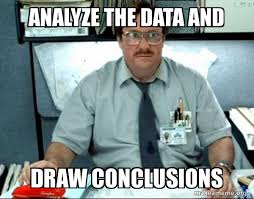 </center>

### **Steps involved in EDA**

###The steps mentioned below are helpful in performing EDA.You are suggested to do it if applicable in the dataset.

- Check the shape of the data frame.
- Check for null values.
- Convert the variables into appropriate data types if there is a mismatch.
- Check for the frequency of different classes in case of a categorical variable.
- Check for distribution of continuous variables

###Below is a checklist to guide you while performing EDA.

- What kind of data do you have?
- What’s missing from the data?
- Where are the outliers?
- How can you add, change or remove features to get more out of your data?
  - Feature Selection
  - Handling missing values
  - Handling skewed data
  - Handling outliers
  - Encoding
  - Feature Scaling

Finally we have the most important question, 
"What question are you trying to solve ?"  
You need to think about questions you can ask of a dataset.  
Questions can be simple as "What is the number of survivors?" or 
"Which gender had a better chance of survival?"  
You goal is to formulate your questions and making inferences.


### **Resources**
Watching:

- [EDA using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ)
- [Feature Selection-How To Drop Features Using Pearson Correlation](https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2)


Reading:

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Skewness in Machine Learning](https://beingdatum.com/handling-skewness-in-machine-learning/)
- [Transforming Skewed Data for Machine Learning](https://opendatascience.com/transforming-skewed-data-for-machine-learning/)
- [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [Box Plot Diagram to Identify Outliers](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)
- [Convert a categorical variable to a number for Machine Learning Model Building](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


In [ ]:
# run this cell before proceeding further
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2021-07-11 17:37:42--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2021-07-11 17:37:42 (5.14 MB/s) - ‘titanic.csv’ saved [61194/61194]



*Make sure to run the above cell before loading the data*

Use the 'titanic.csv' dataset for the questions in this section.

#### **Using the concepts learnt till now perform EDA on the titanic datset**.

#### The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods.
**With Titanic dataset analysis draw minimum 5 conclusions from  and also answer the following questions .**

1)What is the overall passengers survival ratio?

2)Which groups have higher chances for survival?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

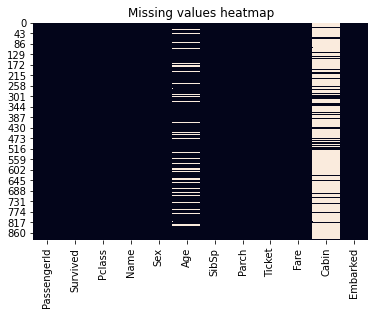

In [ ]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
df.shape


(891, 12)

In [ ]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

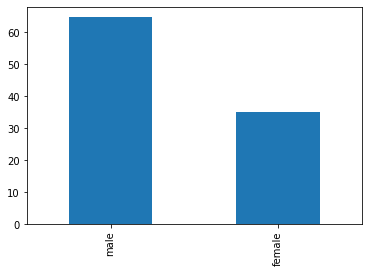

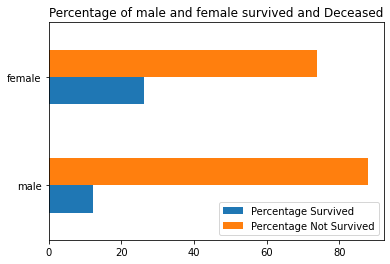

In [ ]:
df.drop(['Cabin'], axis = 1)
fig_sex = (df.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female_pr = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

In [ ]:
df.value_counts()

**Features**

In [ ]:
#1_Age
pd.DataFrame(df.Age.describe())

,Age
count,891.000000
mean,29.560236
std,13.005010
min,0.420000
25%,22.000000
50%,29.000000
75%,35.000000
max,80.000000


Text(0.5, 1.0, 'Overall Passenger Survive Percentage')

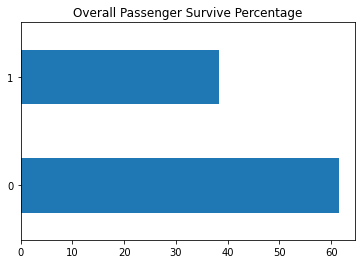

In [ ]:
#2_Survived
(df.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Overall Passenger Survive Percentage")

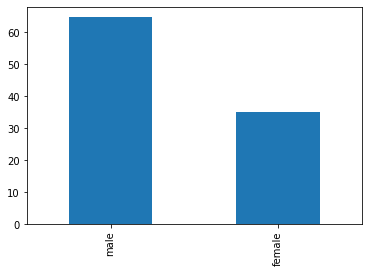

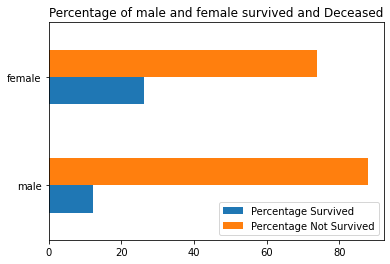

In [ ]:
#3_Sex
fig_sex = (df.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female_pr = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

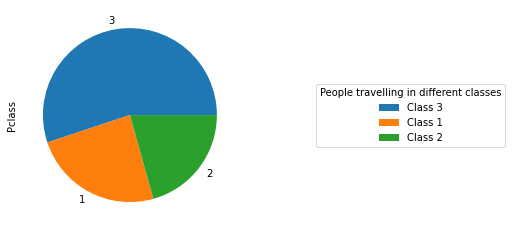

In [ ]:
#4_Class
fig_pclass = df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("People travelling in different classes")


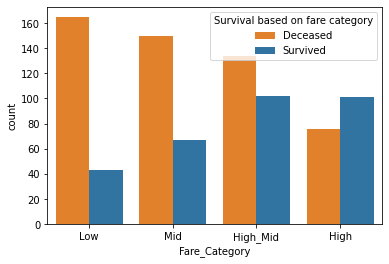

In [ ]:
#5_fare
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")

In [ ]:
#1 What is the overall passengers survival ratio?
survivor= (df.Survived == 1).value_counts()[1]
deceased= (df.Survived == 0).value_counts()[1]
print(f"Overall Passengers Survival Ratio :  {survivor / deceased}")

2 Which groups have higher chances for survival?
Ans-According to the above features survey an A class female aged between 0-10 with high fare haves the higher chance of survival.(The result may vary according to features we take) 